# 5. Visualizing Facial Expressions
*written by Eshin Jolly and Jin Hyun Cheong*

Py-Feat includes several tools to help standardize the visualization of AUs a using transformations of a neutral "template" face. In this tutorial we go over how to plot facial expression data using images and how to make animated videos.

## Py-Feat's pre-trained Action Unit visualization model

To visualize AUs, Py-Feat includes a pre-trained partial-least-squares (PLS) model that can map between a vector of AU intensities (between 0-N) and vector of landmark transformations. In other words, given a vector of AU intensities we can use the `plot_face()` function to visualize the resulting facial expression.

Below we just plot a neutral face by setting all AU intensities to 0. For plotting faces, a 4x5 aspect ratio seems to work best:

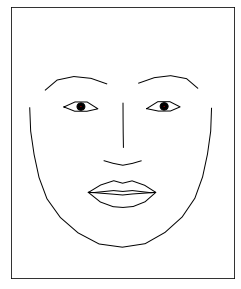

In [48]:
from feat.plotting import plot_face
import numpy as np

# 20 dimensional vector of AU intensities
aus = np.zeros(20)

ax = plot_face(au=aus)

### Draw lineface using input vector

Affectiva vectors should be divided by twenty for use with our 'blue' model. 

<AxesSubplot:>

<AxesSubplot:>

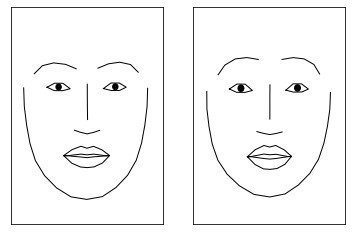

In [3]:
from feat.plotting import plot_face
import numpy as np
import matplotlib.pyplot as plt

# Add data, AU is ordered as such: 
# AU1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 18, 20, 23, 24, 25, 26, 28, 43

# Activate AU1: Inner brow raiser 
au = [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Plot face
fig, axes = plt.subplots(1,2)
plot_face(model=None, ax = axes[0], au = np.zeros(20), color='k', linewidth=1, linestyle='-')
plot_face(model=None, ax = axes[1], au = np.array(au), color='k', linewidth=1, linestyle='-')

### Add a vectorfield with arrows from the changed face back to neutral and vice versa 

<AxesSubplot:>

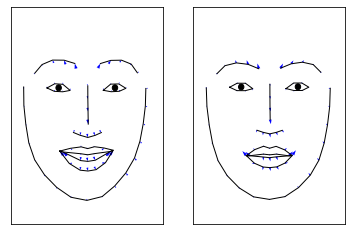

In [10]:
from feat.plotting import plot_face, predict
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

model = load_h5('pyfeat_aus_to_landmarks.h5')
# Add data activate AU1, and AU12
au = np.array([2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 ])

# Get neutral landmarks
neutral = predict(np.zeros(len(au)))

# Provide target landmarks and other vector specifications
vectors = {'target': predict(au),
           'reference':  neutral, 'color': 'blue'}

fig, axes = plt.subplots(1,2)
# Plot face where vectorfield goes from neutral to target, with target as final face
plot_face(model = model, ax = axes[0], au = np.array(au), 
            vectorfield = vectors, color='k', linewidth=1, linestyle='-')

# Plot face where vectorfield goes from neutral to target, with neutral as base face
plot_face(model = model, ax = axes[1], au = np.zeros(len(au)), 
            vectorfield = vectors, color='k', linewidth=1, linestyle='-')

### Add muscle heatmaps to the plot

<AxesSubplot:>

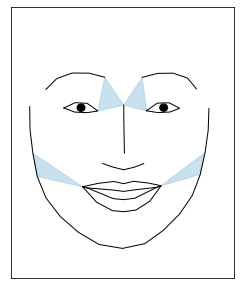

In [11]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
model = load_h5()

au = np.array([2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Add some muscles
muscles = {'orb_oris_l': 'yellow', 'orb_oris_u': "blue"}
muscles = {'all': 'heatmap'}

plot_face(model=model, au = np.array(au), 
          muscles = muscles, color='k', linewidth=1, linestyle='-')

<AxesSubplot:>

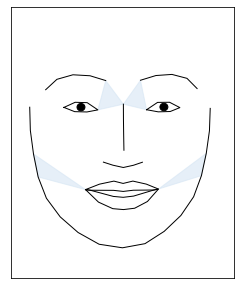

In [12]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = [0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0]
au = np.array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Add some muscles
muscles = {'all': 'heatmap'}

# Plot face
plot_face(model=None, au = np.array(au), muscles = muscles, color='k', linewidth=1, linestyle='-')

### Make sure muscle array contains 'facet' for a facet heatmap

<AxesSubplot:>

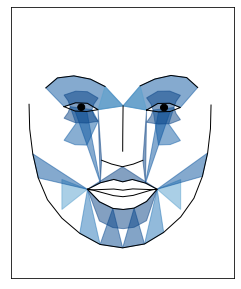

In [13]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = np.array([0.127416, 0.809139, 0, 0.343189, 0.689964, 1.23862, 1.28464, 0.79003, 0.842145, 0.111669, 
      0.450328, 1.02961, 0.871225, 0, 1.1977,  0.457218, 0, 0, 0, 0])

# Load a model 
model = load_h5()

# Add muscles
muscles = {'all': 'heatmap', 'facet': 1}

# Plot face
plot_face(model=model, au = au, muscles = muscles, color='k', linewidth=1, linestyle='-')

### Add gaze vectors
Add gaze vectors to indicate where the eyes are looking.   
Gaze vectors are length 4 (lefteye_x, lefteye_y, righteye_x, righteye_y) where the y orientation is positive for looking upwards.

<AxesSubplot:>

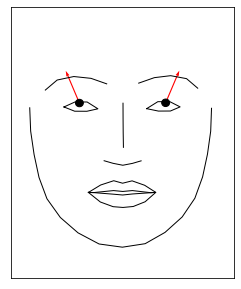

In [14]:
from feat.plotting import plot_face
from feat.utils import load_h5
import numpy as np
import matplotlib.pyplot as plt

# Add data
au = np.zeros(20)

# Add some gaze vectors: (lefteye_x, lefteye_y, righteye_x, righteye_y)
gaze = [-1, 5, 1, 5]

# Plot face
plot_face(model=None, au = au, gaze = gaze, color='k', linewidth=1, linestyle='-')

### Call plot method on Fex instances
It is possible to call the `plot_aus` method within openface, facet, affdex fex instances

OpenFace

<AxesSubplot:>

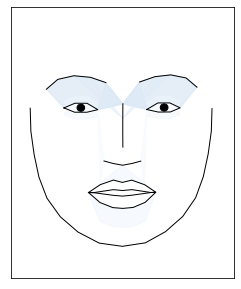

In [20]:
from feat.plotting import plot_face
import numpy as np
import matplotlib.pyplot as plt
from feat.utils import  load_h5, get_resource_path, read_openface
from feat.tests.utils import get_test_data_path
from os.path import join

test_file = join(get_test_data_path(),'OpenFace_Test.csv')
openface = read_openface(test_file)
openface.plot_aus(12, muscles={'all': "heatmap"}, gaze = None)

## Animating facial expressions

Py-Feat includes the `animate_face()` function which makes it easy to "morph" one facial expression into another by interpolating between AU intensities. You can use this function in two ways:
1. Using the `AU` keyword argument and a single scalar value for `start` and `end`
2. Passing in 2 arrays of AU intensities for `start` and `end` 

The first method is mostly just a convenient way to visualize changes for a single AU. The second method behaves like `plot_face` and is more flexible and generally useful when multiple AUs change together.

In [ ]:
from feat.plotting import animate_face 

# Just pass in a FACS AU id, in this case we pass in 12
# corner puller'
animation = animate_face(
    AU=12, start=0, end=3, title="AU12", save="AU12.gif"
)


![](./AU12.gif)

In [ ]:
# This is the index of the first AU
au_to_animate = 0

# Start with neutral face
starting_aus = np.zeros(20)
ending_aus = np.zeros(20)

# Just increase the ending intensity of a single AU
ending_aus[au_to_animate] = 3

animation = animate_face(
    start=starting_aus, end=ending_aus, title="AU1", save="AU1.gif"
)


![](./AU1.gif)

### Animating all AUs

Using `plot_face()` and the helper function `_interploate_aus()` we can easily make a grid of all 20 AUs and animate their intensity changes one at a time from a netural facial expression. To generate the animation from matplotlib plots, we use the [`celluloid`](https://github.com/jwkvam/celluloid) library that makes it a bit easier to work with matplotlib animations. 

In [27]:
from feat.utils import RF_AU_presence # AU ids
from feat.plotting import _interpolate_aus # cubic easing interpolation
from celluloid import Camera

# Link AU ids to their descriptions; might be wrong? see:
# https://imotions.com/blog/facial-action-coding-system/
au_name_map = list(
    zip(
        RF_AU_presence,
        [
            "inner brow raiser",
            "outer brow raiser",
            "brow lowerer",
            "upper lid raiser",
            "cheek raiser",
            "lid tightener",
            "nose wrinkler",
            "upper lip raiser",
            "lip corner puller",
            "dimpler",
            "lip corner depressor",
            "chin raiser",
            "lip puckerer",
            "lip stretcher",
            "lip tightener",
            "lip pressor",
            "lips part",
            "jaw drop",
            "lip suck",
            "eyes closed",
        ],
    )
)

# Start all AUs at neutral
starting_intensities = np.zeros((20, 20))
# And eventually get to 3
ending_intensities = np.eye(20) * 3

# Define some animation settings
fps = 15
duration = 0.5
padding = 0.25
num_frames = int(np.ceil(fps * duration))
num_padding_frames = int(np.ceil(fps * padding))
total_frames = (num_frames + num_padding_frames) * 2


In [ ]:
# Loop over each frame of the animation, plot a 4 x 5 grid of faces
fig, axs = plt.subplots(4, 5, figsize=(12, 18))
camera = Camera(fig)

for frame_num in range(total_frames):
    for i, ax in enumerate(axs.flat):
        au_interpolations = _interpolate_aus(
            start=starting_intensities[i, :],
            end=ending_intensities[i, :],
            num_frames=num_frames,
            num_padding_frames=num_padding_frames,
        )

        ax = plot_face(model=None, ax=ax, au=au_interpolations[frame_num])
        _ = ax.set(title=f"{au_name_map[i][0]}\n{au_name_map[i][1]}")
    _ = camera.snap()

# Create the animation
animation = camera.animate()
animation.save("all.gif", fps=fps)


![](./all.gif)